In [32]:
# pip install -U kaleido
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import date
import os

# For displaying Chinese texts
from matplotlib.font_manager import FontProperties
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

# Format date
today = date.today()
date_format = today.strftime("%b_%d")

# For displaying the entire dataframe in terminal
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)  # Auto-expand the display
pd.set_option('display.expand_frame_repr', False)  # Prevent the dataframe from wrapping

# import Excel file
project_directory = os.getcwd()
data_folder = "plots-"f"{date.today()}"
folder_path = os.path.join(project_directory, data_folder)
os.chdir(folder_path)

excel_file = "ig_post_data_" + date_format + ".xlsx"
df = pd.read_excel(excel_file)
df = df.loc[::-1].reset_index(drop=True)
df['impressions_from_various_sources'] = df[["impressions_from_home", "impressions_from_hashtag", "impressions_from_profile", "impressions_from_other"]].sum(axis=1)
column_order = df.columns.tolist()
column_order.insert(10, column_order.pop(column_order.index('impressions_from_various_sources')))
df = df[column_order]

In [2]:
# Impressions from Various Sources Pie Chart

# impression_home = df["impressions_from_home"].sum()
# impression_hashtag = df["impressions_from_hashtag"].sum()
# impression_explore = df["impressions_from_profile"].sum()
# impression_other = df["impressions_from_other"].sum()

# labels = ['Impressions from Home','Impressions from Hashtags','Impressions from Explore','Impressions from Other']
# values = [impression_home, impression_hashtag, impression_explore, impression_other]

# fig = px.pie(df, values=values, names=labels, title = "Impressions from various sources " + f"({date.today()})", hole = 0.4, width = 500,
#              height = 300, color_discrete_sequence= px.colors.sequential.Sunsetdark)

# fig.update_layout(
#     margin=dict(l=50, r=50, t=100, b=50),
#     legend=dict(
#     yanchor = "bottom",
#     y= 0.25,
#     xanchor = "left",
#     x=1.2
# )
# )

# fig.show()
# #pio.write_image(fig, f'impressions_pie_{date_format}.png')

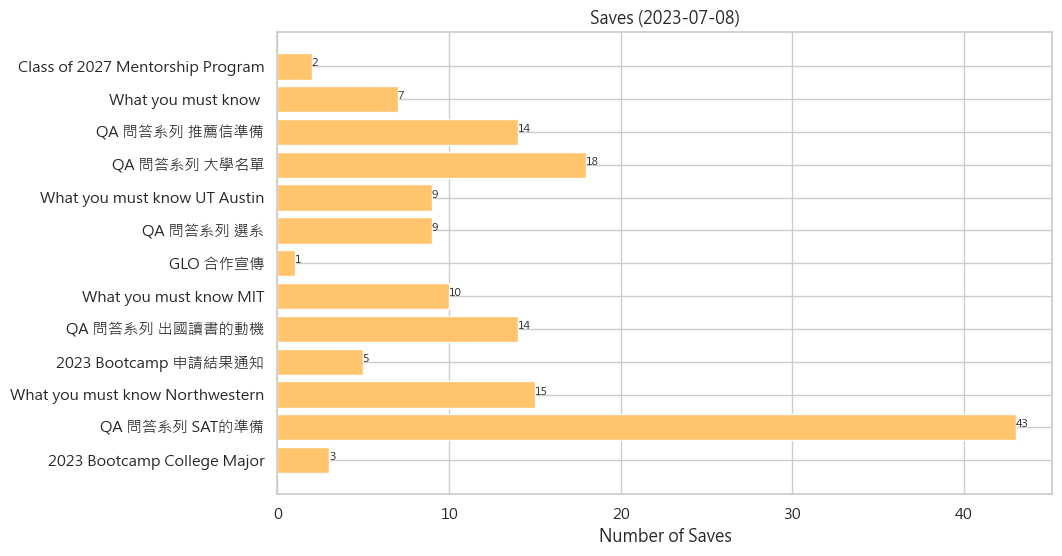

In [33]:
# Saves
# Matplotlib
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["saves"], color = "#FFC46C") 
plt.title("Saves " + f"({date.today()})")
plt.xlabel("Number of Saves")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["saves"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'saves_{date_format}.png', bbox_inches='tight')
#plt.show()


# Plotly (prettier than Matplotlib)
# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["saves"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name= "Saves"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Saves " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Saves"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
saves_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["saves"]):
    saves_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
saves_fig.show()
saves_fig.write_image(f'saves_{date_format}.jpeg', width = 1000, height = 500)

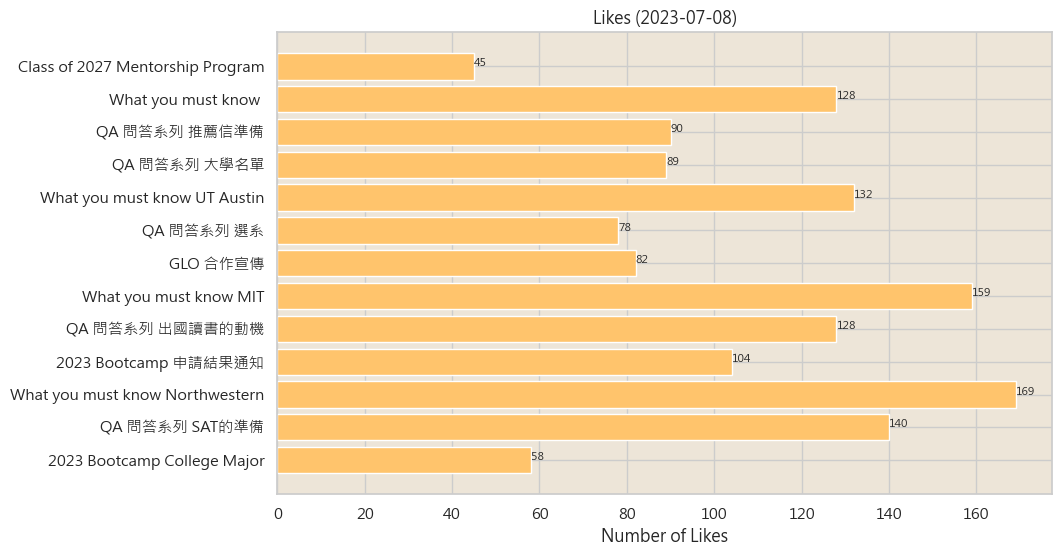

In [34]:
# Likes
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["likes"], color = "#FFC46C") 
plt.title("Likes " + f"({date.today()})")
plt.xlabel("Number of Likes")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["likes"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'likes_{date_format}.png', bbox_inches='tight')
#plt.show()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["likes"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name = "Likes"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Likes " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Likes"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
likes_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["likes"]):
    likes_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
likes_fig.show()
likes_fig.write_image(f'likes_{date_format}.jpeg', width = 1000, height = 500)

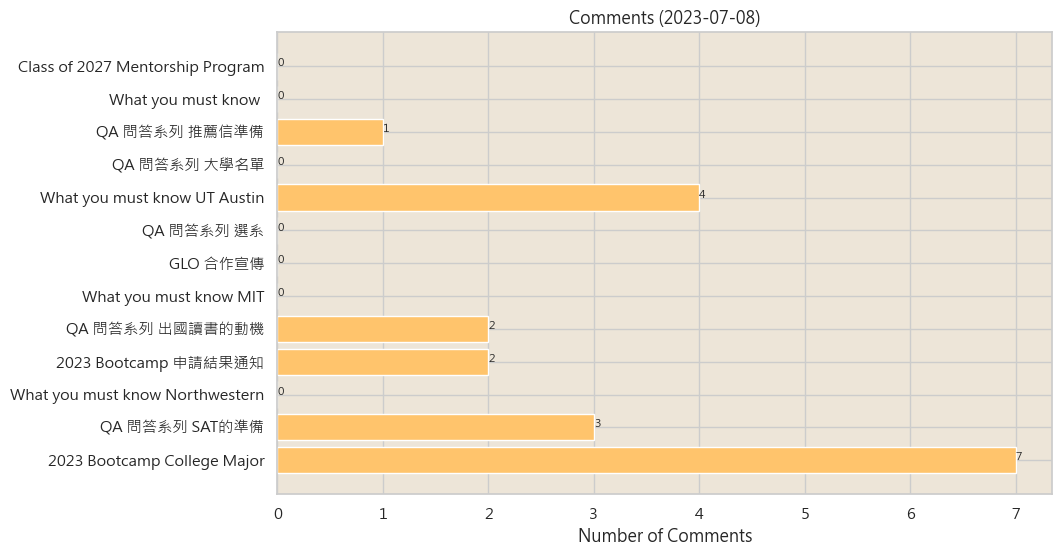

In [35]:
# Comments
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["comments"], color = "#FFC46C") 
plt.title("Comments " + f"({date.today()})")
plt.xlabel("Number of Comments")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["comments"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'comments_{date_format}.png', bbox_inches='tight')
#plt.show()
comments_plot = plt.gcf()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["comments"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Comments"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Comments " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Comments"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
comments_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["comments"]):
    comments_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
comments_fig.show()
comments_fig.write_image(f'comments_{date_format}.jpeg', width = 1000, height = 500)

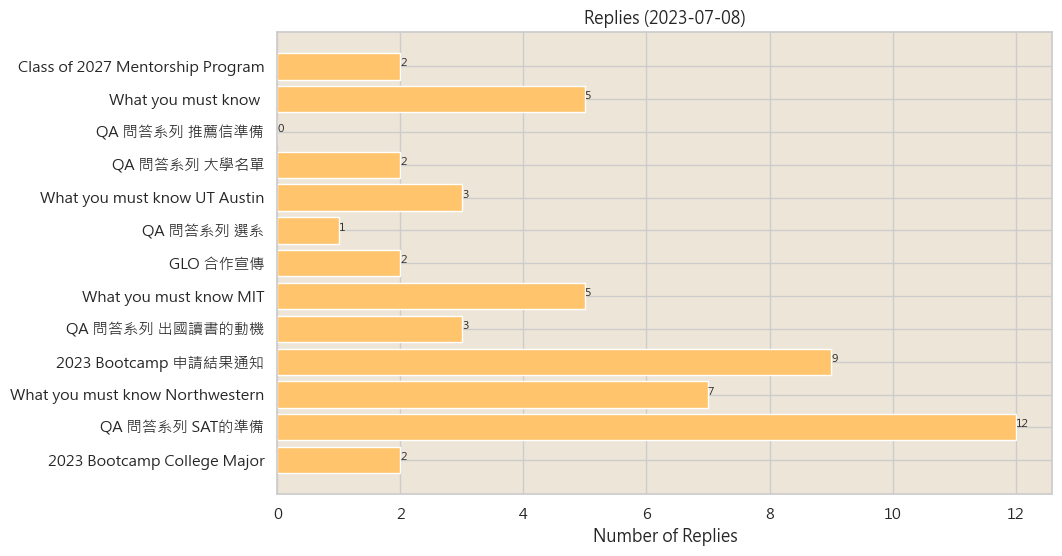

In [36]:
# Replies
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["replies"], color = "#FFC46C") 
plt.title("Replies " + f"({date.today()})")
plt.xlabel("Number of Replies")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["replies"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'replies_{date_format}.png', bbox_inches='tight')
#plt.show()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["replies"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Replies"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Replies " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Replies"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
replies_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["replies"]):
    replies_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
replies_fig.show()
replies_fig.write_image(f'replies_{date_format}.jpeg', width = 1000, height = 500)

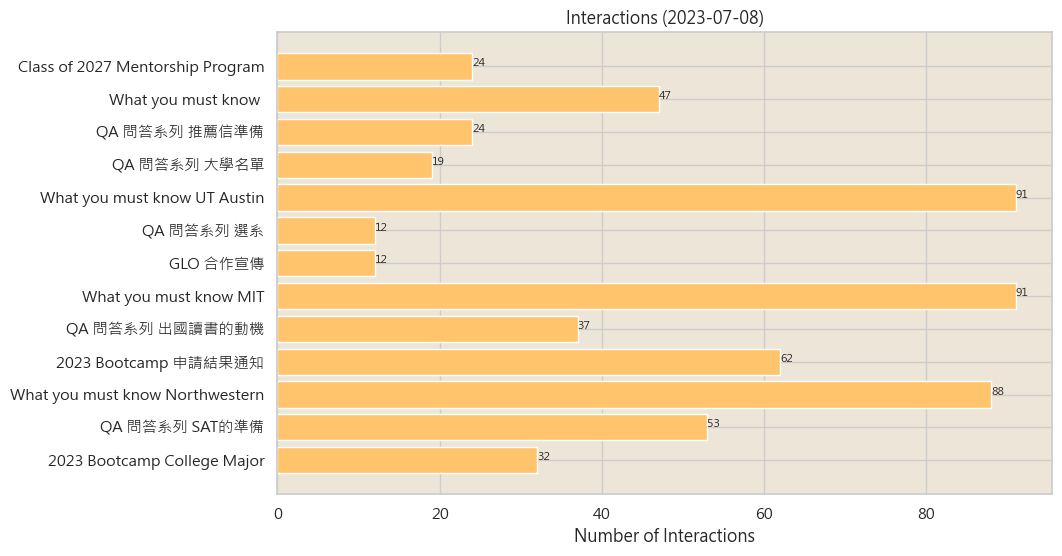

In [37]:
# Interactions
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["interactions"], color = "#FFC46C") 
plt.title("Interactions " + f"({date.today()})")
plt.xlabel("Number of Interactions")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["interactions"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'interactions_{date_format}.png', bbox_inches='tight')
#plt.show()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["interactions"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Interactions"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Interactions " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Interactions"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
interactions_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["interactions"]):
    interactions_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
interactions_fig.show()
interactions_fig.write_image(f'interactions_{date_format}.jpeg', width = 1000, height = 500)

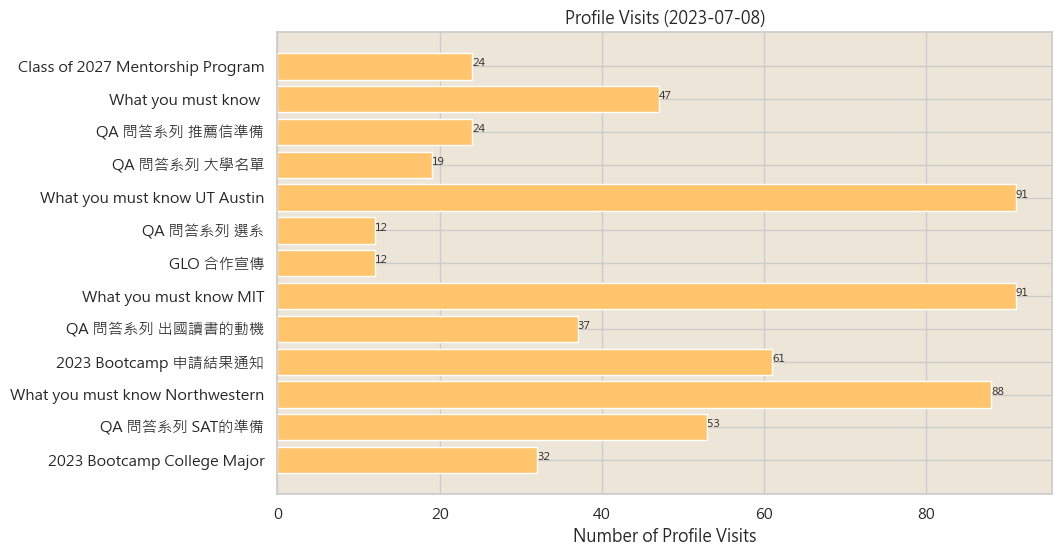

In [38]:
# Profile Visits 
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["profile_visits"], color = "#FFC46C") 
plt.title("Profile Visits " + f"({date.today()})")
plt.xlabel("Number of Profile Visits")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["profile_visits"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'profile_visits_{date_format}.png', bbox_inches='tight')
#plt.show()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["profile_visits"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Profile Visits"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Profile Visits " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Profile Visits"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
profile_visits_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["profile_visits"]):
    profile_visits_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
profile_visits_fig.show()
profile_visits_fig.write_image(f'profile_visits_{date_format}.jpeg', width = 1000, height = 500)

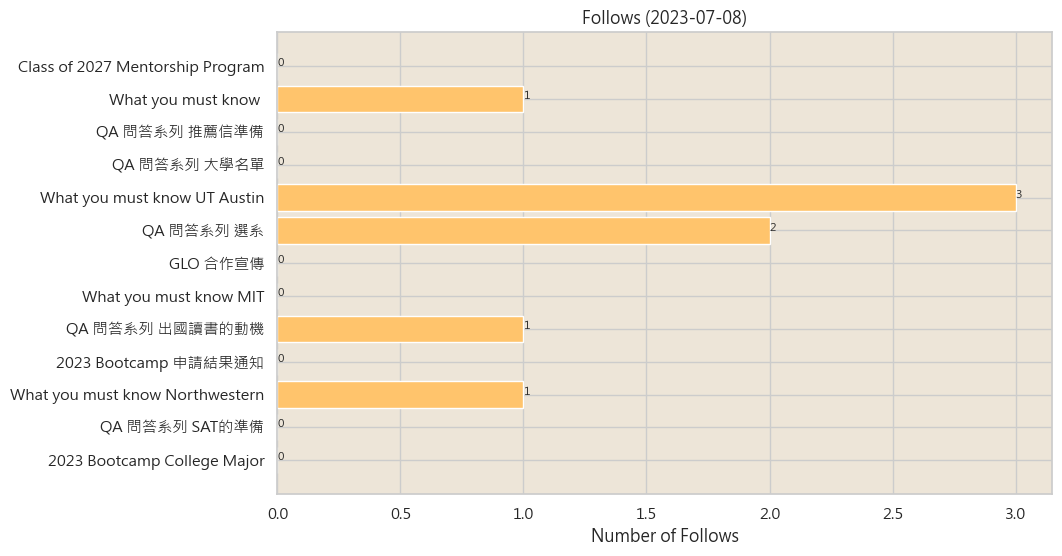

In [39]:
# Follows
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["follows"], color = "#FFC46C") 
plt.title("Follows " + f"({date.today()})")
plt.xlabel("Number of Follows")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["follows"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'follows_{date_format}.png', bbox_inches='tight')
#plt.show()
follows_plot = plt.gcf()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["follows"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Follows"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Follows " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Follows"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
follows_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["follows"]):
    follows_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
follows_fig.show()
follows_fig.write_image(f'follows_{date_format}.jpeg', width = 1000, height = 500)

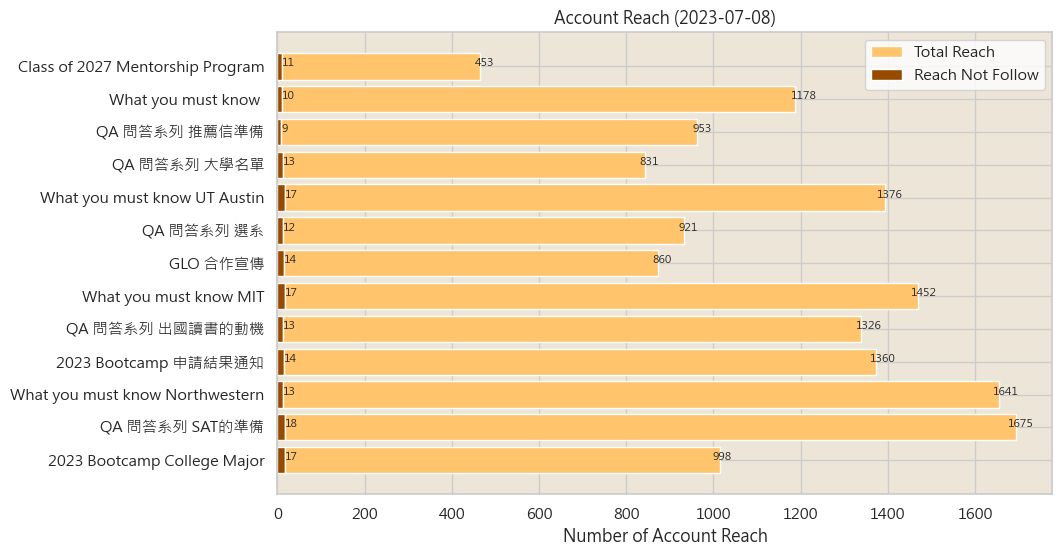

In [40]:
# Account reach, account reach not follow
plt.figure(figsize=(10,6))
reach_not_follow = plt.barh(df["label"], width = df["account_reach_not_follow"], color = "#964B00") 
reach_total = plt.barh(df["label"], width = df["account_reach"], left = df["account_reach_not_follow"], color = "#FFC46C") 

plt.title("Account Reach " + f"({date.today()})")
plt.xlabel("Number of Account Reach")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
plt.legend([reach_total, reach_not_follow], ["Total Reach", "Reach Not Follow"], facecolor = "white")

for index, value in enumerate(df["account_reach"]):
    plt.text(value, index,
             str(value), fontsize = 8)
for index, value in enumerate(df["account_reach_not_follow"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'reach_{date_format}.png', bbox_inches='tight')
#plt.show()

# Create the reach not follow trace
trace_not_follow = go.Bar(
    y=df["label"],
    x=df["account_reach_not_follow"] * 0.01 * df["account_reach"],
    orientation='h',
    marker=dict(color="#964B00"),
    name="Reach Not Follow"
)

# Create the total reach trace
trace_total = go.Bar(
    y=df["label"],
    x=df["account_reach"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Total Reach"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
        text="Account Reach " + f"({date.today()})",
        x=0.6,  # Set the x-position of the title to the center of the plot
        y=0.96  # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Account Reach"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height=500,
    margin=dict(l=50, r=50, t=50, b=50),
    barmode='stack'  # Set the barmode to 'stack' for stacked bars
)

# Create the Figure object and add the data and layout
account_reach_fig = go.Figure(data=[trace_not_follow, trace_total], layout=layout)

# Add text annotations to the bars
# for i, value in enumerate(df["account_reach_not_follow"]):
#     account_reach_fig.add_annotation(
#         x=value,
#         y=df["label"][i],
#         text="     " + str(value),
#         font=dict(size=8),
#         showarrow=False
#     )

for i, value in enumerate(df["account_reach"]):
    account_reach_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="               " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
account_reach_fig.show()
account_reach_fig.write_image(f'account_reach_{date_format}.jpeg', width = 1000, height = 500)

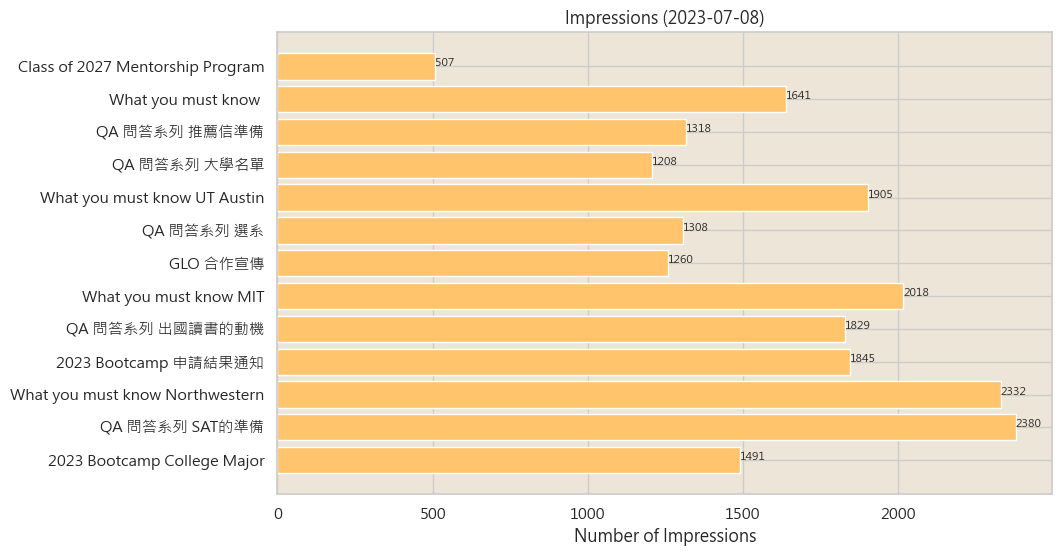

In [41]:
# Impressions
plt.figure(figsize=(10,6))
plt.barh(df["label"], width = df["impressions"], color = "#FFC46C") 
plt.title("Impressions " + f"({date.today()})")
plt.xlabel("Number of Impressions")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
for index, value in enumerate(df["impressions"]):
    plt.text(value, index,
             str(value), fontsize = 8)
#plt.savefig(f'impressions_{date_format}.png', bbox_inches='tight')
#plt.show()

# Convert the Matplotlib bar plot to Plotly-compatible traces
data = go.Bar(
    y=df["label"],
    x=df["impressions"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Impressions"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
    text="Impressions " + f"({date.today()})",
    x=0.6,  # Set the x-position of the title to the center of the plot
    y=0.96   # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Impressions"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height = 500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Create the Figure object and add the data and layout
impressions_fig = go.Figure(data=data, layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["impressions"]):
    impressions_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="     " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
impressions_fig.show()
impressions_fig.write_image(f'impressions_{date_format}.jpeg', width = 1000, height = 500)

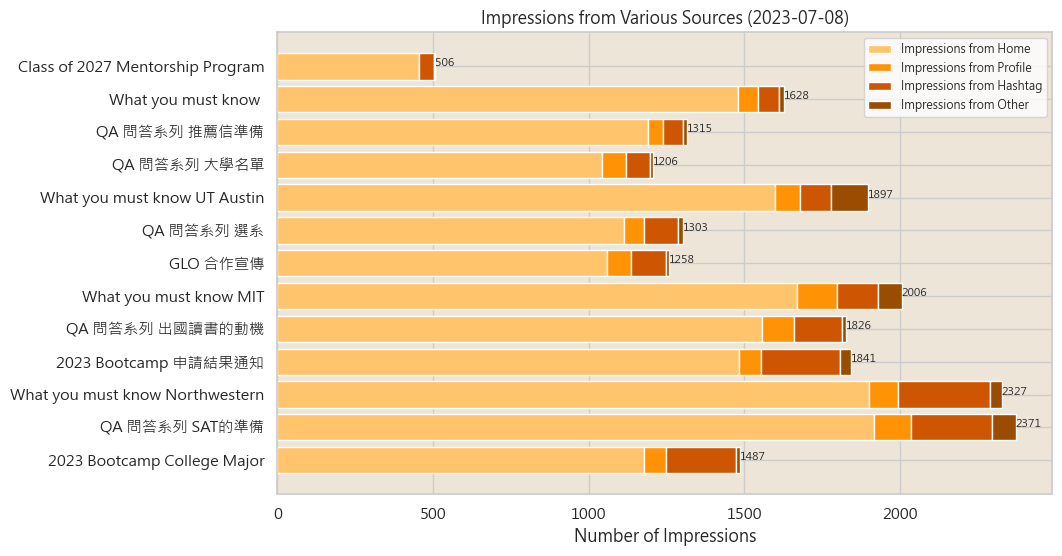

In [42]:
# Impressions from home, profile, hashtag, and other
# for unknown reason these values do not sum up to total impressions

plt.figure(figsize=(10,6))
impressions_from_home = plt.barh(df["label"], width = df["impressions_from_home"], color = "#FFC46C")
impressions_from_profile = plt.barh(df["label"], width = df["impressions_from_profile"], 
                                    left = df["impressions_from_home"], color = "#FF9205") 
impressions_from_hashtag = plt.barh(df["label"], width = df["impressions_from_hashtag"], 
                                    left = df["impressions_from_home"] + df["impressions_from_profile"], color = "#CE5501") 
impressions_from_other = plt.barh(df["label"], width = df["impressions_from_other"], 
                                  left = df["impressions_from_home"] + df["impressions_from_profile"] + df["impressions_from_hashtag"], color = "#9A4D00")

plt.title("Impressions from Various Sources " + f"({date.today()})")
plt.xlabel("Number of Impressions")
plt.rcParams['axes.facecolor'] = "#EDE5D8"
plt.legend([impressions_from_home, impressions_from_profile, impressions_from_hashtag, impressions_from_other], 
           ["Impressions from Home", "Impressions from Profile", "Impressions from Hashtag",
            "Impressions from Other"], facecolor = "white", loc = "best", fontsize = "x-small")

for index, value in enumerate(df["impressions_from_various_sources"]):
    plt.text(value, index,
            str(value), fontsize = 8)
#plt.savefig(f'impressions_from_various_sources_{date_format}.png', bbox_inches='tight')
#plt.show()

# Create the impressions from home trace
trace_home = go.Bar(
    y=df["label"],
    x=df["impressions_from_home"],
    orientation='h',
    marker=dict(color="#FFC46C"),
    name="Impressions from Home"
)

# Create the impressions from profile trace
trace_profile = go.Bar(
    y=df["label"],
    x=df["impressions_from_profile"],
    orientation='h',
    marker=dict(color="#FF9205"),
    name="Impressions from Profile"
)

# Create the impressions from hashtag trace
trace_hashtag = go.Bar(
    y=df["label"],
    x=df["impressions_from_hashtag"],
    orientation='h',
    marker=dict(color="#CE5501"),
    name="Impressions from Hashtag"
)

# Create the impressions from other trace
trace_other = go.Bar(
    y=df["label"],
    x=df["impressions_from_other"],
    orientation='h',
    marker=dict(color="#9A4D00"),
    name="Impressions from Other"
)

# Create the layout for the plot
layout = go.Layout(
    title=dict(
        text="Impressions from Various Sources " + f"({date.today()})",
        x=0.5,  # Set the x-position of the title to the center of the plot
        y=0.96  # Set the y-position of the title (0 is the top, 1 is the bottom)
    ),
    xaxis=dict(title="Number of Impressions"),
    yaxis=dict(title=""),
    paper_bgcolor="#EDE5D8",
    yaxis_tickfont=dict(size=12),
    bargap=0.3,
    height=500,
    margin=dict(l=50, r=50, t=50, b=50),
    barmode='stack'  # Set the barmode to 'stack' for stacked bars
)

# Create the Figure object and add the data and layout
impressions_from_various_sources_fig = go.Figure(data=[trace_home, trace_profile, trace_hashtag, trace_other], layout=layout)

# Add text annotations to the bars
for i, value in enumerate(df["impressions_from_various_sources"]):
    impressions_from_various_sources_fig.add_annotation(
        x=value,
        y=df["label"][i],
        text="         " + str(value),
        font=dict(size=8),
        showarrow=False
    )

# Display the interactive plot
impressions_from_various_sources_fig.show()
impressions_from_various_sources_fig.write_image(f'impressions_from_various_sources_{date_format}.jpeg', width = 1000, height = 500)

In [12]:
# change back to the project directory
os.chdir(project_directory)